In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
path = "PYTORCH_NOTEBOOKS/Data"

In [3]:
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
%matplotlib inline

In [4]:
transform = transforms.ToTensor()

In [5]:
train_data = datasets.MNIST(root = path,train = True,transform = transform)
test_data = datasets.MNIST(root = path,train = False,transform = transform)

In [6]:
for image,label in train_data:
    break

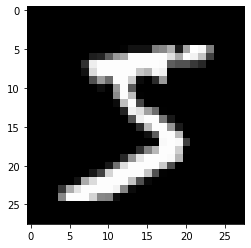

In [7]:
plt.imshow(image.reshape(28,28),cmap = 'gray')

In [8]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: PYTORCH_NOTEBOOKS/Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [9]:
train_loader = DataLoader(train_data,batch_size = 100,shuffle = True)
test_loader = DataLoader(test_data,batch_size = 500,shuffle  = True)

In [10]:
type(train_loader)

torch.utils.data.dataloader.DataLoader

In [11]:
for i,j in train_loader:
    break

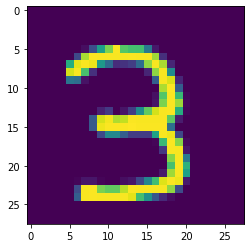

In [12]:
plt.imshow(i[4].reshape(28,28))

In [13]:
class MultilayerModel(nn.Module):
    def __init__(self,in_l = 784,out_l = 10,layers = [120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_l,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_l)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x  = self.fc3(x)
        return F.log_softmax(x,1)
    

In [14]:
model = MultilayerModel()

In [15]:
model

MultilayerModel(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

In [17]:
import time
start_time = time.time()

epochs = 10
train_loss = []
train_correct = []
test_loss = []
test_correct = []
for i in range(epochs):
    tr_cr=  0
    ts_cr = 0
    for b,(x_train,y_train) in enumerate(train_loader):
        b+=1
        y_pred = model(x_train.view(100,-1))
        loss = criterion(y_pred,y_train)
        predicted = torch.max(y_pred.data,1)[1]
        batch_corr = (predicted==y_train).sum()
        tr_cr+=batch_corr
        
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if(b%200==0):
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \ accuracy: {tr_cr.item()*100/(100*b):7.3f}%')
    train_loss.append(loss)
    train_correct.append(tr_cr)

    with torch.no_grad():
                  for ba,(x_test,y_test) in enumerate(test_loader):
                        y_eval = model(x_test.view(500,-1))
                        predicted = torch.max(y_eval.data,1)[1]
                        ts_cr += (predicted == y_test).sum()
    loss = criterion(y_eval,y_test)
    test_loss.append(loss)
    test_correct.append(ts_cr)

duration = time.time() - start_time
print(f'\nDuration: {duration:.0f} seconds') # print the time elapsed            

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.27577889  \ accuracy:  82.875%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.12821026  \ accuracy:  87.338%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.16959782  \ accuracy:  89.475%
epoch:  1  batch:  200 [ 20000/60000]  loss: 0.18695801  \ accuracy:  94.740%
epoch:  1  batch:  400 [ 40000/60000]  loss: 0.22513595  \ accuracy:  95.085%
epoch:  1  batch:  600 [ 60000/60000]  loss: 0.14701681  \ accuracy:  95.267%
epoch:  2  batch:  200 [ 20000/60000]  loss: 0.11754944  \ accuracy:  96.505%
epoch:  2  batch:  400 [ 40000/60000]  loss: 0.19960760  \ accuracy:  96.615%
epoch:  2  batch:  600 [ 60000/60000]  loss: 0.07129001  \ accuracy:  96.697%
epoch:  3  batch:  200 [ 20000/60000]  loss: 0.12616484  \ accuracy:  97.495%
epoch:  3  batch:  400 [ 40000/60000]  loss: 0.09267089  \ accuracy:  97.445%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.10112746  \ accuracy:  97.425%
epoch:  4  batch:  200 [ 20000/60000]  loss: 0.13517797  \ accur

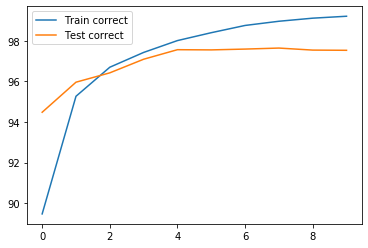

In [22]:
plt.plot([t/600 for t in train_correct],label = 'Train correct')
plt.plot([t/100 for t in test_correct],label = 'Test correct')
plt.legend()